In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# local imports
from metrics import ranking_auc, NoNegativeLabelsError, NoPositiveLabelsError
from plotting import plot_ranking_curves, DPI, FIG_SIZE

# set plot parameters
plt.rcParams["figure.figsize"] = FIG_SIZE

In [3]:
%load_ext autoreload
%autoreload 2

# Example: One-shot Retrieval

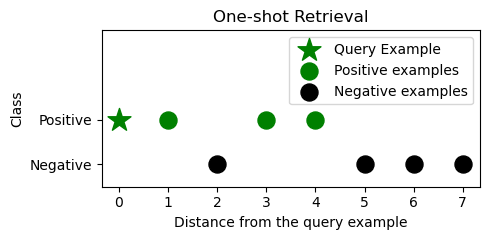

In [4]:
# Sample data
sample_scores = np.array([1, 2, 3, 4, 5, 6, 7]) # distance from the query example
sample_labels = np.array([1, 0, 1, 1, 0, 0, 0])

# Add a green star at score 0
plt.scatter(0, 1, color="green", marker="*", s=300, label="Query Example")

# Create a scatter plot
# Create a scatter plot for green circles
plt.scatter(sample_scores[sample_labels == 1], np.ones((sample_labels == 1).sum()), color="green", s=150, label="Positive examples")
# Create a scatter plot for black circles
plt.scatter(sample_scores[sample_labels == 0], np.zeros((sample_labels == 0).sum()), color="black", s=150, label="Negative examples")
# Add labels and title
plt.ylim(-0.5, 3)
plt.yticks([0, 1], ["Negative", "Positive"])
plt.xlabel("Distance from the query example")
plt.ylabel("Class")
plt.title("One-shot Retrieval")
plt.legend()
# Show the plot
plt.tight_layout()
plt.savefig("./figures/ranking_curves/example/one-shot-retrieval-data.png")
plt.show()
# plt.clf()  # Clear the current figure

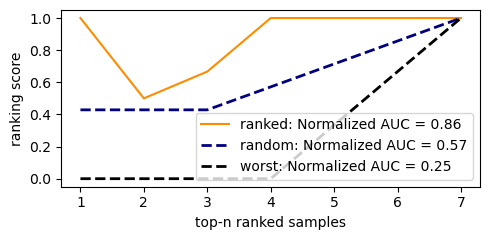

In [5]:
result = ranking_auc(
    scores=sample_scores,
    labels=sample_labels,
    pos_label=1,
    greater_is_better=False,  # lower distance means higher rank
)
# print(result)

plot_ranking_curves(
    x=result["x"],
    y=result["y"],
    y_expected_case=result["y_expected_case"],
    y_worst_case=result["y_worst_case"],
    auc=result["auc"],
    auc_expected_case=result["auc_expected_case"],
    auc_worst_case=result["auc_worst_case"],
    # title="One-shot Retrieval",
    show=True,
    save=True,
    save_dir="./figures/ranking_curves/example",
    save_name="one-shot-retrieval-performance",
    save_ext="png",
)
# plt.clf()  # Clear the current figure

# Example: Supervised Retrieval

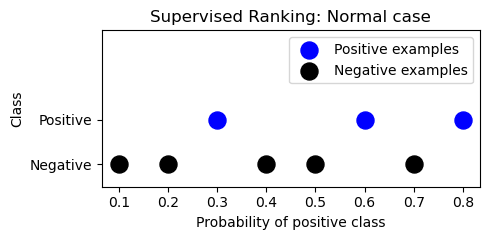

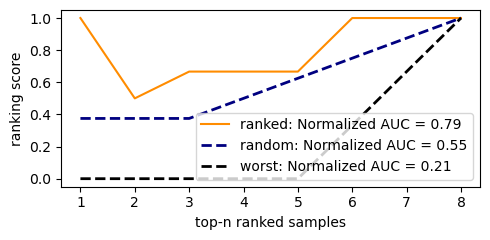

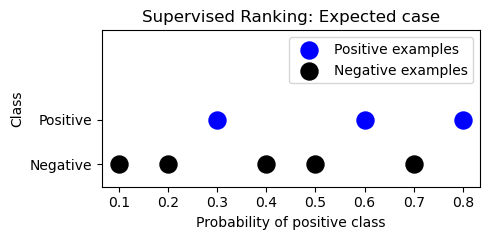

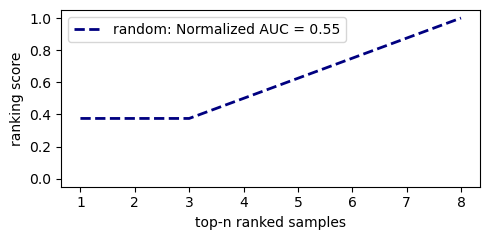

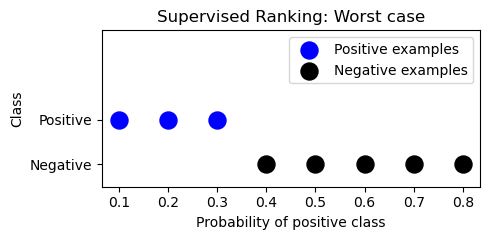

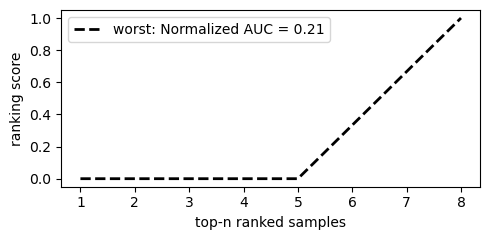

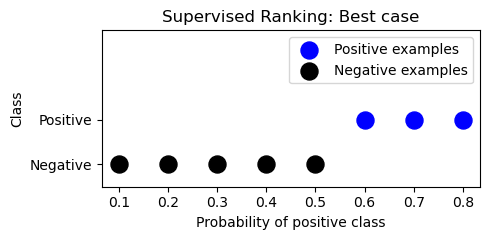

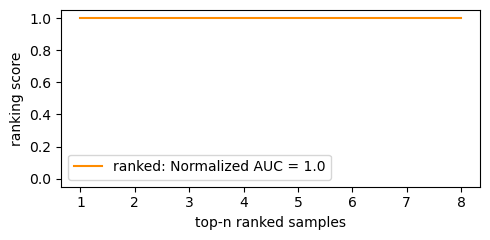

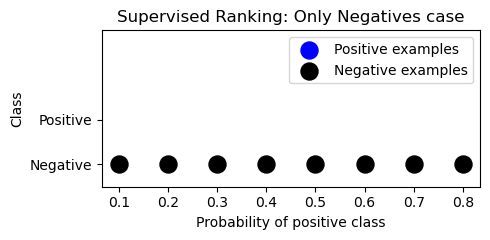

No positive labels found for pos_label=1.


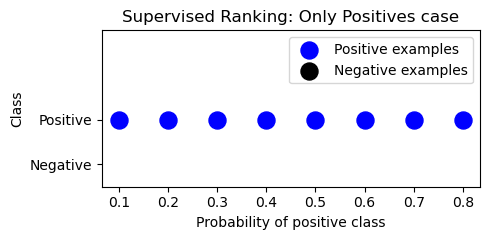

No negative labels found for pos_label=1.


In [6]:
# Sample data
# probability of coming from the positive class
sample_scores = np.array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
cases_2_labels = {
    'Normal': [1, 0, 1, 0, 0, 1, 0, 0],
    'Expected': [1, 0, 1, 0, 0, 1, 0, 0], # dummy labels for expected case
    'Worst': [0, 0, 0, 0, 0, 1, 1, 1], # positive examples have the lowest probabilities
    'Best': [1, 1, 1, 0, 0, 0, 0, 0],  # positive examples have the highest probabilities
    'Only Negatives': [0, 0, 0, 0, 0, 0, 0, 0], # no positive examples
    'Only Positives': [1, 1, 1, 1, 1, 1, 1, 1], # no negative examples
}
# convert the labels to numpy arrays
cases_2_labels = {case: np.array(labels) for case, labels in cases_2_labels.items()}


for case, sample_labels in cases_2_labels.items():
    print("=" * 80)

    # Create a scatter plot for blue circles
    plt.scatter(sample_scores[sample_labels == 1], np.ones(sample_labels.sum()), color="blue", s=150, label="Positive examples")
    # Create a scatter plot for black circles
    plt.scatter(sample_scores[sample_labels == 0], np.zeros((sample_labels == 0).sum()), color="black", s=150, label="Negative examples")
    # Add labels and title
    plt.ylim(-0.5, 3)
    plt.xlabel("Probability of positive class")
    plt.ylabel("Class")
    plt.yticks([0, 1], ["Negative", "Positive"])
    plt.title(f"Supervised Ranking: {case} case")
    plt.legend()
    # Show the plot
    plt.tight_layout()
    plt.savefig("./figures/ranking_curves/example/supervised_data_" + case.lower().replace(" ", "_") + ".png")
    plt.show()
    # plt.clf()  # Clear the current figure

    try:
        result = ranking_auc(
            scores=sample_scores,
            labels=sample_labels,
            pos_label=1,
            greater_is_better=True # higher probability means higher rank
        )
    except (NoPositiveLabelsError, NoNegativeLabelsError) as e:
        print(e)
        continue
    # print(result)


    if case == "Best":
        result['y_expected_case'] = None
        result['auc_expected_case'] = None
        result['y_worst_case'] = None
        result['auc_worst_case'] = None
    elif case == "Expected":
        result['y'] = None
        result['auc'] = None
        result['y_worst_case'] = None
        result['auc_worst_case'] = None
    elif case == "Worst":
        result['y'] = None
        result['auc'] = None
        result['y_expected_case'] = None
        result["auc_expected_case"] = None


    plot_ranking_curves(
        x=result['x'],
        y=result['y'],
        y_expected_case=result["y_expected_case"],
        y_worst_case=result["y_worst_case"],
        auc=result['auc'],
        auc_expected_case=result["auc_expected_case"],
        auc_worst_case=result["auc_worst_case"],
        # title=f"{case} case",
        # title=f"Supervised Ranking: {case} case",
        show=True,
        save=True,
        save_dir="./figures/ranking_curves/example",
        save_name="supervised_performance_" + case.lower().replace(" ", "_"),
        save_ext="png",
    )
    # plt.clf()  # Clear the current figure
